<a href="https://colab.research.google.com/github/AKEX1/Big-Data/blob/main/BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploración de Datos (EDA): Analicen las calificaciones de películas por parte
de los usuarios, identifiquen géneros populares y patrones de preferencias

In [1]:
!pip install pandas


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Cargar el archivo movies.csv
movies_df = pd.read_csv('/movies.csv')

# Cargar el archivo ratings.csv
ratings_df = pd.read_csv('/ratings.csv')

train_data, test_data = train_test_split(ratings_df, test_size=0.2, random_state=42)
# Cargar el archivo tags.csv
tags_df = pd.read_csv('/tags.csv')

# Mostrar las primeras filas de cada DataFrame para verificar que se han cargado correctamente
print("Movies DataFrame:")
print(movies_df.head())

print("\nRatings DataFrame:")
print(ratings_df.head())

print("\nTags DataFrame:")
print(tags_df.head())


Movies DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings DataFrame:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Tags DataFrame:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly

In [3]:
# Calcular el promedio de los ratings para cada película
average_ratings = ratings_df.groupby('movieId')['rating'].mean().reset_index()
average_ratings.columns = ['movieId', 'average_rating']

# Unir el promedio de los ratings con la información de las películas
movies_with_ratings = pd.merge(movies_df, average_ratings, on='movieId')

# Ordenar las películas por el rating promedio de mayor a menor
movies_with_ratings_sorted = movies_with_ratings.sort_values(by='average_rating', ascending=False)

# Mostrar las primeras 10 películas con mejor rating
print("\nTop 20 películas con mejor rating:")
print(movies_with_ratings_sorted[['title', 'average_rating']].head(20))


Top 20 películas con mejor rating:
                                                  title  average_rating
7638              Paper Birds (Pájaros de papel) (2010)             5.0
8089                         Act of Killing, The (2012)             5.0
9065                                    Jump In! (2007)             5.0
9076                                       Human (2015)             5.0
9078                                L.A. Slasher (2015)             5.0
4245                                   Lady Jane (1986)             5.0
8136                     Bill Hicks: Revelations (1993)             5.0
8130                       Justice League: Doom (2012)              5.0
4240          Open Hearts (Elsker dig for evigt) (2002)             5.0
9104                             Formula of Love (1984)             5.0
8097                                Maniac Cop 2 (1990)             5.0
9111             Dragons: Gift of the Night Fury (2011)             5.0
8056                        

In [4]:
# Calcular el promedio de los ratings para cada película
average_ratings = ratings_df.groupby('movieId')['rating'].mean().reset_index()
average_ratings.columns = ['movieId', 'average_rating']

# Unir el promedio de los ratings con la información de las películas
movies_with_ratings = pd.merge(movies_df, average_ratings, on='movieId')

# Ordenar las películas por el rating promedio de mayor a menor
movies_with_ratings_sorted = movies_with_ratings.sort_values(by='average_rating', ascending=True)

# Mostrar las primeras 10 películas con mejor rating
print("\nTop 20 películas con peor rating:")
print(movies_with_ratings_sorted[['title', 'average_rating']].head(20))


Top 20 películas con peor rating:
                                           title  average_rating
5541                            Lionheart (1990)             0.5
2685                                Gypsy (1962)             0.5
4872                     Follow Me, Boys! (1966)             0.5
9099                       Idaho Transfer (1973)             0.5
7280                              Case 39 (2009)             0.5
9103          Bloodsport: The Dark Kumite (1999)             0.5
7536                Hard Ticket to Hawaii (1987)             0.5
8764                           Superfast! (2015)             0.5
8125       Yongary: Monster from the Deep (1967)             0.5
9572                      The Emoji Movie (2017)             0.5
5547                             Begotten (1990)             0.5
9426                             Iron Man (1931)             0.5
4971                         Raising Cain (1992)             0.5
8373                           Son of God (2014)       

In [5]:
# Contar el número de ratings por usuario
ratings_count_by_user = ratings_df.groupby('userId')['rating'].count().reset_index()
ratings_count_by_user.columns = ['userId', 'ratings_count']

# Ordenar los usuarios por la cantidad de ratings dados de mayor a menor
top_users = ratings_count_by_user.sort_values(by='ratings_count', ascending=False).head(10)

# Mostrar los top 10 usuarios que más ratings dieron
print("\nTop 10 usuarios que más ratings dieron:")
print(top_users)


Top 10 usuarios que más ratings dieron:
     userId  ratings_count
413     414           2698
598     599           2478
473     474           2108
447     448           1864
273     274           1346
609     610           1302
67       68           1260
379     380           1218
605     606           1115
287     288           1055


Preprocesamiento de Datos: Limpien y preparen los datos de calificaciones
para el análisis.

In [6]:

tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [7]:
tags_df['tag']

0                  funny
1        Highly quotable
2           will ferrell
3           Boxing story
4                    MMA
              ...       
3678           for katie
3679             austere
3680              gun fu
3681    heroic bloodshed
3682    Heroic Bloodshed
Name: tag, Length: 3683, dtype: object

In [8]:
import re

# Define a function to clean the tag
def clean(tag):
    # Remove mentions (e.g., @username)
    tag = re.sub(r'@\w+', '', tag)
    # Remove hashtags (e.g., #hashtag)
    tag = re.sub(r'#\w+', '', tag)
    # Remove special characters and numericals, leaving only alphabets and spaces
    tag = re.sub(r'[^A-Za-z\s]+', '', tag)
    # Remove extra spaces
    tag = re.sub(r'\s+', ' ', tag).strip()
    return tag

# Example of usage with a sample tag
# Cleaning the tag in the review column
tags_df['Cleaned Reviews'] = tags_df['tag'].apply(clean)
tags_df.head()

,userId,movieId,tag,timestamp,Cleaned Reviews
0,2,60756,funny,1445714994,funny
1,2,60756,Highly quotable,1445714996,Highly quotable
2,2,60756,will ferrell,1445714992,will ferrell
3,2,89774,Boxing story,1445715207,Boxing story
4,2,89774,MMA,1445715200,MMA


In [9]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(tag):
    tags = pos_tag(word_tokenize(tag))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

tags_df['POS tagged'] = tags_df['Cleaned Reviews'].apply(token_stop_pos)
tags_df.head()
# mydata['POS tagged'][0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,userId,movieId,tag,timestamp,Cleaned Reviews,POS tagged
0,2,60756,funny,1445714994,funny,"[(funny, n)]"
1,2,60756,Highly quotable,1445714996,Highly quotable,"[(Highly, n), (quotable, a)]"
2,2,60756,will ferrell,1445714992,will ferrell,"[(ferrell, v)]"
3,2,89774,Boxing story,1445715207,Boxing story,"[(Boxing, n), (story, n)]"
4,2,89774,MMA,1445715200,MMA,"[(MMA, n)]"


In [10]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

tags_df['Lemma'] = tags_df['POS tagged'].apply(lemmatize)
tags_df.head()
# print(mydata['review'][239] + "\n" + mydata['Lemma'][239])

,userId,movieId,tag,timestamp,Cleaned Reviews,POS tagged,Lemma
0,2,60756,funny,1445714994,funny,"[(funny, n)]",funny
1,2,60756,Highly quotable,1445714996,Highly quotable,"[(Highly, n), (quotable, a)]",Highly quotable
2,2,60756,will ferrell,1445714992,will ferrell,"[(ferrell, v)]",ferrell
3,2,89774,Boxing story,1445715207,Boxing story,"[(Boxing, n), (story, n)]",Boxing story
4,2,89774,MMA,1445715200,MMA,"[(MMA, n)]",MMA


In [11]:
tags_df[['tag', 'Lemma']]

,tag,Lemma
0,funny,funny
1,Highly quotable,Highly quotable
2,will ferrell,ferrell
3,Boxing story,Boxing story
4,MMA,MMA
...,...,...
3678,for katie,katie
3679,austere,austere
3680,gun fu,gun fu
3681,heroic bloodshed,heroic bloodshed


In [12]:
!pip install vaderSentiment
#!pip install pyvlfeat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.2 MB/s eta 0:00:00


In [13]:
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [14]:
fin_data = pd.DataFrame(tags_df[['tag', 'Lemma']])

In [15]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity)
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity)
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,tag,Lemma,Polarity,Analysis
0,funny,funny,0.25,Positive
1,Highly quotable,Highly quotable,0.16,Positive
2,will ferrell,ferrell,0.00,Neutral
3,Boxing story,Boxing story,0.00,Neutral
4,MMA,MMA,0.00,Neutral


In [16]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Analysis
Neutral     2940
Positive     396
Negative     347
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x78e08a018400>,
 [Text(-0.8863757609335835, 0.6514123198323861, 'Neutral'),
  Text(0.6578218938468424, -0.8816293756311401, 'Positive'),
  Text(1.2912935597686634, -0.39377778314675543, 'Negative')],
 [Text(-0.4834776877819546, 0.3553158108176651, '79.8%'),
  Text(0.35881194209827766, -0.48088875034425815, '10.8%'),
  Text(0.8130366857802696, -0.2479341597590682, '9.4%')])

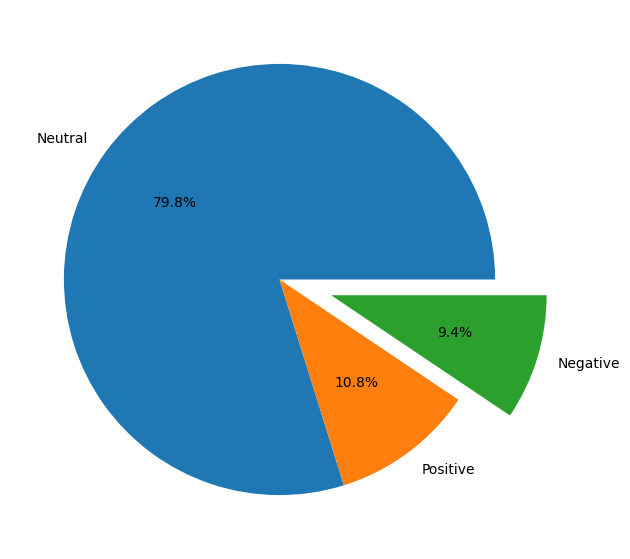

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
# plt.legend()

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate polarity for each tag and store it in a new column
tags_df['Polarity'] = tags_df['tag'].apply(lambda tag: analyzer.polarity_scores(tag)['compound'])

print(tags_df.head())

   userId  movieId              tag   timestamp  Cleaned Reviews  \
0       2    60756            funny  1445714994            funny   
1       2    60756  Highly quotable  1445714996  Highly quotable   
2       2    60756     will ferrell  1445714992     will ferrell   
3       2    89774     Boxing story  1445715207     Boxing story   
4       2    89774              MMA  1445715200              MMA   

                     POS tagged              Lemma  Polarity  
0                  [(funny, n)]              funny    0.4404  
1  [(Highly, n), (quotable, a)]    Highly quotable    0.0000  
2                [(ferrell, v)]            ferrell    0.0000  
3     [(Boxing, n), (story, n)]       Boxing story    0.0000  
4                    [(MMA, n)]                MMA    0.0000  


In [19]:
# Group the DataFrame by movieId and calculate the mean polarity for each movie
movie_polarity = tags_df.groupby('movieId')['Polarity'].mean()

# Sort the movies by mean polarity in descending order
top_10_movies = movie_polarity.sort_values(ascending=False).head(10)

print(top_10_movies)

movieId
912       0.778300
8920      0.636900
1120      0.636900
42422     0.636900
8754      0.636900
351       0.557400
1235      0.557400
3385      0.542300
122918    0.510600
112852    0.501125
Name: Polarity, dtype: float64


In [20]:
# Get the movie IDs of the top 10 movies
top_10_movie_ids = top_10_movies.index.tolist()

# Filter the movies_df DataFrame to get the rows with these movieIds
selected_movies = movies_df[movies_df['movieId'].isin(top_10_movie_ids)]

# Merge the selected movies with the top_10_movies Series to get the polarity
top_10_with_polarity = selected_movies.merge(top_10_movies, left_on='movieId', right_index=True)

# Sort the result by Polarity in descending order
top_10_with_polarity_sorted = top_10_with_polarity.sort_values('Polarity', ascending=False)

# Select and print the movieId, title, and Polarity columns
print(top_10_with_polarity_sorted[['movieId', 'title', 'Polarity']])

      movieId                                           title  Polarity
694       912                               Casablanca (1942)  0.778300
850      1120              People vs. Larry Flynt, The (1996)  0.636900
5291     8754           Prime of Miss Jean Brodie, The (1969)  0.636900
5353     8920                        Country Girl, The (1954)  0.636900
6100    42422  Voices of a Distant Star (Hoshi no koe) (2003)  0.636900
309       351                         Corrina, Corrina (1994)  0.557400
935      1235                         Harold and Maude (1971)  0.557400
2525     3385                               Volunteers (1985)  0.542300
8695   122918                Guardians of the Galaxy 2 (2017)  0.510600
8475   112852                  Guardians of the Galaxy (2014)  0.501125




Cálculo de Similitud: Comparen las preferencias de los usuarios para
determinar similitudes entre ellos.


In [21]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Split the 'genres' string into a list of genres
movies_df['genres_list'] = movies_df['genres'].str.split('|')

# Create one-hot encoded genre vectors
vectorizer = CountVectorizer()
genre_vectors = vectorizer.fit_transform(movies_df['genres_list'].apply(lambda x: ' '.join(x)))

# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(genre_vectors)

# Create a DataFrame from the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, index=movies_df['movieId'], columns=movies_df['movieId'])

print(similarity_df)

movieId    1         2         3         4         5         6         7       \
movieId                                                                         
1        1.000000  0.774597  0.316228  0.258199  0.447214  0.000000  0.316228   
2        0.774597  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3        0.316228  0.000000  1.000000  0.816497  0.707107  0.000000  1.000000   
4        0.258199  0.000000  0.816497  1.000000  0.577350  0.000000  0.816497   
5        0.447214  0.000000  0.707107  0.577350  1.000000  0.000000  0.707107   
...           ...       ...       ...       ...       ...       ...       ...   
193581   0.670820  0.288675  0.353553  0.288675  0.500000  0.288675  0.353553   
193583   0.774597  0.333333  0.408248  0.333333  0.577350  0.000000  0.408248   
193585   0.000000  0.000000  0.000000  0.577350  0.000000  0.000000  0.000000   
193587   0.316228  0.000000  0.000000  0.000000  0.000000  0.408248  0.000000   
193609   0.447214  0.000000 

In [23]:
# Filter movies_df for adventure movies
adventure_movies = movies_df[movies_df['genres'].str.contains('Adventure')]

# Merge adventure movies with polarity scores
adventure_polarity = adventure_movies.merge(tags_df, on='movieId', how='left')

# Group by movieId, calculate mean polarity, and sort
top_10_adventure = adventure_polarity.groupby('movieId')['Polarity'].mean().sort_values(ascending=False).head(10)

# Get the movie IDs of the top 10 adventure movies
top_10_adventure_ids = top_10_adventure.index.tolist()

# Filter movies_df to get the rows with these movieIds
selected_adventure_movies = movies_df[movies_df['movieId'].isin(top_10_adventure_ids)]

# Merge the selected movies with the top_10_adventure Series to get the polarity
top_10_adventure_with_names = selected_adventure_movies.merge(top_10_adventure, left_on='movieId', right_index=True)

top_10_adventure_with_names_sorted = top_10_adventure_with_names.sort_values('Polarity', ascending=False).head(10)
# Select and print the movieId, title, and Polarity columns
print(top_10_adventure_with_names_sorted[['movieId', 'title', 'Polarity']])

      movieId                                              title  Polarity
8695   122918                   Guardians of the Galaxy 2 (2017)  0.510600
8475   112852                     Guardians of the Galaxy (2014)  0.501125
6792    60516                                   Meet Dave (2008)  0.440400
8617   118696   The Hobbit: The Battle of the Five Armies (2014)  0.440400
8879   134130                                 The Martian (2015)  0.401900
7955    96079                                     Skyfall (2012)  0.390433
6015    38038  Wallace & Gromit in The Curse of the Were-Rabb...  0.318450
1596     2138                              Watership Down (1978)  0.299700
4445     6564  Lara Croft Tomb Raider: The Cradle of Life (2003)  0.296700
9636   179401              Jumanji: Welcome to the Jungle (2017)  0.200400


Combinacion de generos y palabras

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate title similarity
tfidf = TfidfVectorizer()
title_vectors = tfidf.fit_transform(movies_df['title'])
title_similarity = cosine_similarity(title_vectors)

# Combine genre and title similarity (simple average)
combined_similarity = (similarity_df.values + title_similarity) / 2

# Create a DataFrame from the combined similarity matrix
combined_similarity_df = pd.DataFrame(combined_similarity, index=movies_df['movieId'], columns=movies_df['movieId'])

print(combined_similarity_df)

movieId    1         2         3         4         5         6         7       \
movieId                                                                         
1        1.000000  0.480954  0.225054  0.195358  0.288974  0.103455  0.251769   
2        0.480954  1.000000  0.073512  0.072764  0.071785  0.113612  0.102850   
3        0.225054  0.073512  1.000000  0.460256  0.404862  0.081204  0.573512   
4        0.195358  0.072764  0.460256  1.000000  0.339461  0.080377  0.481012   
5        0.288974  0.071785  0.404862  0.339461  1.000000  0.079296  0.425338   
...           ...       ...       ...       ...       ...       ...       ...   
193581   0.335410  0.144338  0.176777  0.144338  0.281062  0.144338  0.176777   
193583   0.387298  0.166667  0.204124  0.166667  0.288675  0.000000  0.204124   
193585   0.000000  0.000000  0.000000  0.288675  0.000000  0.000000  0.000000   
193587   0.158114  0.000000  0.000000  0.000000  0.000000  0.204124  0.000000   
193609   0.223607  0.000000 

In [25]:
# Filter horror movies
horror_movies = movies_df[movies_df['genres'].str.contains('Horror')]

# Get name-genre similarity scores for horror movies
horror_similarity_scores = combined_similarity_df.loc[horror_movies['movieId'], horror_movies['movieId']]

# Calculate the average name-genre similarity for each horror movie
average_horror_similarity = horror_similarity_scores.mean(axis=1)

# Sort horror movies by average similarity and select top 10
top_10_horror = average_horror_similarity.sort_values(ascending=False).head(10)

# Get the movie IDs of the top 10 horror movies
top_10_horror_ids = top_10_horror.index.tolist()

# Convert movie IDs in top_10_horror to integers
top_10_horror.index = top_10_horror.index.astype(int)

# Give the Series a name before merging
top_10_horror.name = 'similarity' # Giving the Series a name

# Now merge the DataFrames
top_10_horror_with_names = selected_horror_movies.merge(top_10_horror, left_on='movieId', right_index=True)

# Select and print the movieId, title, and similarity scores
print(top_10_horror_with_names[['movieId', 'title', 'similarity']]) # Using the given name for similarity scores

NameError: name 'selected_horror_movies' is not defined

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate title similarity
tfidf = TfidfVectorizer()
title_vectors = tfidf.fit_transform(movies_df['title'])
title_similarity = cosine_similarity(title_vectors)

# Combine genre and title similarity (simple average)
combined_similarity = (similarity_df.values + title_similarity) / 2

# Create a DataFrame from the combined similarity matrix
combined_similarity_df = pd.DataFrame(combined_similarity, index=movies_df['movieId'], columns=movies_df['movieId'])

print(combined_similarity_df)



movieId    1         2         3         4         5         6         7       \
movieId                                                                         
1        1.000000  0.480954  0.225054  0.195358  0.288974  0.103455  0.251769   
2        0.480954  1.000000  0.073512  0.072764  0.071785  0.113612  0.102850   
3        0.225054  0.073512  1.000000  0.460256  0.404862  0.081204  0.573512   
4        0.195358  0.072764  0.460256  1.000000  0.339461  0.080377  0.481012   
5        0.288974  0.071785  0.404862  0.339461  1.000000  0.079296  0.425338   
...           ...       ...       ...       ...       ...       ...       ...   
193581   0.335410  0.144338  0.176777  0.144338  0.281062  0.144338  0.176777   
193583   0.387298  0.166667  0.204124  0.166667  0.288675  0.000000  0.204124   
193585   0.000000  0.000000  0.000000  0.288675  0.000000  0.000000  0.000000   
193587   0.158114  0.000000  0.000000  0.000000  0.000000  0.204124  0.000000   
193609   0.223607  0.000000 

In [27]:
# Filter horror movies
horror_movies = movies_df[movies_df['genres'].str.contains('Horror')]

# Get name-genre similarity scores for horror movies
horror_similarity_scores = combined_similarity_df.loc[horror_movies['movieId'], horror_movies['movieId']]

# Calculate the average name-genre similarity for each horror movie
average_horror_similarity = horror_similarity_scores.mean(axis=1)

# Sort horror movies by average similarity and select top 10
top_10_horror = average_horror_similarity.sort_values(ascending=False).head(10)

# Get the movie IDs of the top 10 horror movies
top_10_horror_ids = top_10_horror.index.tolist()

# Filter movies_df to get the rows with these movieIds
selected_horror_movies = movies_df[movies_df['movieId'].isin(top_10_horror_ids)] # Creating the missing variable

# Convert movie IDs in top_10_horror to integers
top_10_horror.index = top_10_horror.index.astype(int)

# Give the Series a name before merging
top_10_horror.name = 'similarity' # Giving the Series a name

# Now merge the DataFrames
top_10_horror_with_names = selected_horror_movies.merge(top_10_horror, left_on='movieId', right_index=True)

# Select and print the movieId, title, and similarity scores
print(top_10_horror_with_names[['movieId', 'title', 'similarity']]) # Using the given name for similarity scores

      movieId                                              title  similarity
842      1105      Children of the Corn IV: The Gathering (1996)    0.341471
1892     2515  Children of the Corn II: The Final Sacrifice (...    0.343786
2091     2784                Masque of the Red Death, The (1964)    0.342346
2870     3838              Phantasm III: Lord of the Dead (1994)    0.342157
4531     6715                       Children of the Night (1991)    0.343386
5133     8225                    Night of the Living Dead (1990)    0.346115
5619    27140                 Candyman 3: Day of the Dead (1999)    0.343032
7255    74370                     House of the Devil, The (2009)    0.348968
7992    96917              House at the End of the Street (2012)    0.345005
9013   140267                                   The Witch (2015)    0.341275


Recomendaciones

In [28]:
def recommend_movies(user_watched_movie_ids, similarity_df, movie_polarity, num_recommendations=10):
  """
  Recommends movies based on user history, similarity, and sentiment polarity.

  Args:
    user_watched_movie_ids: A list of movie IDs the user has watched.
    similarity_df: DataFrame of movie similarities.
    movie_polarity: Series of movie polarity scores.
    num_recommendations: Number of recommendations to generate.

  Returns:
    A DataFrame with recommended movie IDs, titles, similarity scores, and polarity scores.
  """

  # Calculate weighted scores for all movies
  weighted_scores = pd.Series(0, index=similarity_df.index)
  for movie_id in user_watched_movie_ids:
    similarity_scores = similarity_df[movie_id]
    weighted_scores += similarity_scores * movie_polarity

  # Remove movies the user has already watched
  weighted_scores = weighted_scores.drop(user_watched_movie_ids, errors='ignore')

  # Sort movies by weighted score and get top recommendations
  top_recommendations = weighted_scores.sort_values(ascending=False).head(num_recommendations)

  # Get movie titles and polarity scores
  recommended_movie_ids = top_recommendations.index.tolist()
  recommended_movies = movies_df[movies_df['movieId'].isin(recommended_movie_ids)][['movieId', 'title']]
  recommended_movies['Similarity'] = top_recommendations.values
  recommended_movies['Polarity'] = recommended_movies['movieId'].apply(lambda x: movie_polarity.get(x, 0))

  return recommended_movies

# Example usage
user_watched_movie_ids = [1, 5, 10]  # Replace with actual movie IDs
recommendations = recommend_movies(user_watched_movie_ids, combined_similarity_df, tags_df.groupby('movieId')['Polarity'].mean())
print(recommendations)

      movieId                                              title  Similarity  \
357       413                                    Airheads (1994)    0.392412   
850      1120                 People vs. Larry Flynt, The (1996)    0.332727   
2525     3385                                  Volunteers (1985)    0.332078   
4445     6564  Lara Croft Tomb Raider: The Cradle of Life (2003)    0.319285   
4581     6807          Monty Python's The Meaning of Life (1983)    0.279231   
6015    38038  Wallace & Gromit in The Curse of the Were-Rabb...    0.272451   
6792    60516                                   Meet Dave (2008)    0.262406   
8603   117887                                  Paddington (2014)    0.261367   
8617   118696   The Hobbit: The Battle of the Five Armies (2014)    0.249541   
9452   167746                       The Lego Batman Movie (2017)    0.248078   

      Polarity  
357    0.36120  
850    0.63690  
2525   0.54230  
4445   0.29670  
4581   0.36120  
6015   0.31845  


In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ... (Your existing code to calculate combined_similarity_df) ...

def get_recommendations_for_user(user_id, similarity_df, movies_df):
    """
    Provides movie recommendations for a given user based on similarity.

    Args:
        user_id: The ID of the user.
        similarity_df: DataFrame containing the movie similarity matrix.
        movies_df: DataFrame containing movie information.

    Returns:
        A Series of recommended movie titles.
    """

    # Check if user_id exists in the similarity matrix
    if user_id not in similarity_df.index:
        return "User ID not found."

    # Get similarity scores for the given user
    user_similarity_scores = similarity_df.loc[user_id]

    # Sort movies by similarity score in descending order (excluding the user's own ratings)
    sorted_movies = user_similarity_scores.sort_values(ascending=False).iloc[1:]

    # Get the titles of the top 10 recommended movies
    recommended_movie_ids = sorted_movies.index[:10]
    recommended_movie_titles = movies_df.loc[movies_df['movieId'].isin(recommended_movie_ids), 'title']

    return recommended_movie_titles

# Get user input
user_id_input = input("Enter a user ID: ")

# Convert user input to integer (assuming user IDs are integers)
try:
    user_id = int(user_id_input)
except ValueError:
    print("Invalid user ID. Please enter an integer.")
else:
    # Get recommendations
    recommendations = get_recommendations_for_user(user_id, combined_similarity_df, movies_df)
    print(recommendations)

Enter a user ID: 15
484             Three Musketeers, The (1993)
594                           Twister (1996)
720     Adventures of Robin Hood, The (1938)
4999             Four Musketeers, The (1974)
5121                    Captain Blood (1935)
5434            Three Musketeers, The (1948)
5438             King Solomon's Mines (1950)
7936                  Treasure Island (2012)
8132                        Host, The (2013)
9464               Kong: Skull Island (2017)
Name: title, dtype: object


Evaluación del Sistema: Evalúen el rendimiento del sistema de recomendación
con métricas como precisión, exactitud y recall

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ... (Your existing code to calculate combined_similarity_df and top_10_adventure_with_names_sorted) ...

def get_recommendations_for_user(user_id, similarity_df, movies_df, polarity_df, weight_similarity=0.7, weight_polarity=0.3):
    """
    Provides movie recommendations for a given user based on similarity and polarity.

    Args:
        user_id: The ID of the user.
        similarity_df: DataFrame containing the movie similarity matrix.
        movies_df: DataFrame containing movie information.
        polarity_df: DataFrame containing movie polarity scores.
        weight_similarity: Weight assigned to similarity scores.
        weight_polarity: Weight assigned to polarity scores.

    Returns:
        A Series of recommended movie titles.
    """

    if user_id not in similarity_df.index:
        return "User ID not found."

    # Get similarity scores for the given user
    user_similarity_scores = similarity_df.loc[user_id]

    # Convert similarity scores to a DataFrame and reset index to make 'movieId' a column
    recommendations_df = pd.DataFrame({
        'similarity': user_similarity_scores
    }).reset_index()  # Reset index to make 'movieId' a column

    # Merge similarity scores with polarity scores
    recommendations_df = recommendations_df.merge(polarity_df, on='movieId', how='left')

    # Calculate weighted score
    recommendations_df['weighted_score'] = (
        recommendations_df['similarity'] * weight_similarity +
        recommendations_df['Polarity'].fillna(0) * weight_polarity  # Handle missing polarity scores
    )

    # Sort by weighted score in descending order (excluding the user's own ratings)
    sorted_recommendations = recommendations_df.sort_values('weighted_score', ascending=False).iloc[1:]

    # Get the titles of the top 10 recommended movies
    recommended_movie_ids = sorted_recommendations['movieId'][:10]
    recommended_movie_titles = movies_df.loc[movies_df['movieId'].isin(recommended_movie_ids), 'title']

    return recommended_movie_titles

# Get user input
user_id_input = input("Enter a user ID: ")

try:
    user_id = int(user_id_input)
except ValueError:
    print("Invalid user ID. Please enter an integer.")
else:
    # Get recommendations (adjust weights as needed)
    recommendations = get_recommendations_for_user(
        user_id, combined_similarity_df, movies_df, top_10_adventure_with_names_sorted,
        weight_similarity=0.6, weight_polarity=0.4
    )
    print(recommendations)

Enter a user ID: 13
131                                         Casper (1995)
1552                      Rescuers Down Under, The (1990)
1596                                Watership Down (1978)
3704                          Return to Never Land (2002)
6015    Wallace & Gromit in The Curse of the Were-Rabb...
6792                                     Meet Dave (2008)
7691    Phineas and Ferb the Movie: Across the 2nd Dim...
8605                  Ice Age: A Mammoth Christmas (2011)
9427                            Junior and Karlson (1968)
9621                                          Coco (2017)
Name: title, dtype: object


In [32]:
def get_genres_watched_by_user(user_id, ratings_df, movies_df):
    """
    Gets the genres of movies watched/rated by a given user.

    Args:
        user_id: The ID of the user.
        ratings_df: DataFrame containing user ratings.
        movies_df: DataFrame containing movie information including genres.

    Returns:
        A set of unique genres watched by the user.
    """

    # Get movie IDs rated by the user
    user_rated_movie_ids = ratings_df[ratings_df['userId'] == user_id]['movieId'].tolist()

    # Get genres of those movies
    genres_watched = set()
    for movie_id in user_rated_movie_ids:
        movie_genres = movies_df[movies_df['movieId'] == movie_id]['genres'].values
        if movie_genres:
            genres_watched.update(movie_genres[0].split('|'))  # Split
    return genres_watched

# Assuming you have a DataFrame 'ratings_df' containing user ratings
user_id = 13
# Changed 'rating' to 'ratings_df' assuming this was the intended variable
genres_watched = get_genres_watched_by_user(user_id, ratings_df, movies_df)
print(f"Genres watched by user {user_id}: {genres_watched}")

Genres watched by user 13: {'Horror', 'Western', 'War', 'Drama', 'Mystery', 'Romance', 'Comedy', 'Sci-Fi', 'Adventure', 'Thriller', 'Action', 'Fantasy', 'Crime'}


In [33]:
def get_top_genres_by_user(user_id, ratings_df, movies_df, num_top_genres=10):
    """
    Gets the top N genres of movies watched/rated by a given user.

    Args:
        user_id: The ID of the user.
        ratings_df: DataFrame containing user ratings.
        movies_df: DataFrame containing movie information including genres.
        num_top_genres: The number of top genres to return.

    Returns:
        A list of the top N genres watched by the user.
    """

    # Get movie IDs rated by the user
    user_rated_movie_ids = ratings_df[ratings_df['userId'] == user_id]['movieId'].tolist()

    # Get genres of those movies and count their occurrences
    genre_counts = {}
    for movie_id in user_rated_movie_ids:
        movie_genres = movies_df[movies_df['movieId'] == movie_id]['genres'].values
        if movie_genres:
            for genre in movie_genres[0].split('|'):
                genre_counts[genre] = genre_counts.get(genre, 0) + 1

    # Sort genres by count and get the top N
    top_genres = sorted(genre_counts, key=genre_counts.get, reverse=True)[:num_top_genres]

    return top_genres

user_id = 13
top_genres = get_top_genres_by_user(user_id, ratings_df, movies_df)
print(f"Top genres watched by user {user_id}: {top_genres}")

Top genres watched by user 13: ['Drama', 'Thriller', 'Comedy', 'Action', 'Romance', 'Adventure', 'Horror', 'Sci-Fi', 'Crime', 'Mystery']


In [34]:
def get_genre_stats_for_user(user_id, ratings_df, movies_df):
    """
    Calculates the number of movies watched and average rating per genre for a user.

    Args:
        user_id: The ID of the user.
        ratings_df: DataFrame containing user ratings.
        movies_df: DataFrame containing movie information including genres.

    Returns:
        A pandas DataFrame with genre, movies_watched, and average_rating columns.
    """

    # Get movie IDs rated by the user
    user_rated_movie_ids = ratings_df[ratings_df['userId'] == user_id]['movieId'].tolist()

    genre_stats = {}
    for movie_id in user_rated_movie_ids:
        movie_genres = movies_df[movies_df['movieId'] == movie_id]['genres'].values
        if movie_genres:
            for genre in movie_genres[0].split('|'):
                if genre not in genre_stats:
                    genre_stats[genre] = {'movies_watched': 0, 'total_rating': 0}
                genre_stats[genre]['movies_watched'] += 1
                # Get the rating this user gave for this movie
                rating = ratings_df[(ratings_df['userId'] == user_id) & (ratings_df['movieId'] == movie_id)]['rating'].values[0]
                genre_stats[genre]['total_rating'] += rating

    # Create a DataFrame from the genre stats
    genre_stats_df = pd.DataFrame.from_dict(genre_stats, orient='index')

    # Calculate average rating
    genre_stats_df['average_rating'] = genre_stats_df['total_rating'] / genre_stats_df['movies_watched']

    return genre_stats_df[['movies_watched', 'average_rating']]

user_id = 13
genre_stats = get_genre_stats_for_user(user_id, ratings_df, movies_df)
print(genre_stats)

           movies_watched  average_rating
Mystery                 2        4.500000
Thriller               11        3.818182
Comedy                 11        3.272727
Romance                 6        3.666667
Drama                  16        3.500000
Action                 10        4.200000
Adventure               6        4.166667
Horror                  5        4.000000
Sci-Fi                  5        4.200000
War                     2        3.500000
Fantasy                 1        3.000000
Western                 1        4.000000
Crime                   3        3.666667


In [35]:
title = "Watership Down (1978)"
# Assuming you have a DataFrame 'movies_df' with movie information
movie_info = movies_df[movies_df['title'] == title][['movieId', 'genres', 'title']] # Include 'title' column

if not movie_info.empty:
    movie_id = movie_info['movieId'].iloc[0]
    title = movie_info['title'].iloc[0]
    genres = movie_info['genres'].iloc[0]
    print(f"Movie ID: {movie_id}")
    print(f"Title: {title}")
    print(f"Genres: {genres}")
else:
    print(f"Movie with title '{title}' not found in the dataset.")

Movie ID: 2138
Title: Watership Down (1978)
Genres: Adventure|Animation|Children|Drama|Fantasy


In [37]:
def get_genre_stats_for_user(user_id, ratings_df, movies_df, movie_polarity):
    """
    Calculates the number of movies watched, average rating, and average polarity per genre for a user.

    Args:
        user_id: The ID of the user.
        ratings_df: DataFrame containing user ratings.
        movies_df: DataFrame containing movie information including genres.
        movie_polarity: A Series or dictionary mapping movie IDs to polarity scores.

    Returns:
        A pandas DataFrame with genre, movies_watched, average_rating, and average_polarity columns.
    """

    # Get movie IDs rated by the user
    user_rated_movie_ids = ratings_df[ratings_df['userId'] == user_id]['movieId'].tolist()

    genre_stats = {}
    for movie_id in user_rated_movie_ids:
        movie_genres = movies_df[movies_df['movieId'] == movie_id]['genres'].values
        if movie_genres:
            for genre in movie_genres[0].split('|'):
                if genre not in genre_stats:
                    genre_stats[genre] = {'movies_watched': 0, 'total_rating': 0, 'total_polarity': 0}
                genre_stats[genre]['movies_watched'] += 1
                # Get the rating this user gave for this movie
                rating = ratings_df[(ratings_df['userId'] == user_id) & (ratings_df['movieId'] == movie_id)]['rating'].values[0]
                genre_stats[genre]['total_rating'] += rating
                # Get the polarity for this movie
                # Access the polarity from the provided 'movie_polarity' Series using .get() to handle missing values
                polarity = movie_polarity.get(movie_id, 0)
                genre_stats[genre]['total_polarity'] += polarity

    # Create a DataFrame from the genre stats
    genre_stats_df = pd.DataFrame.from_dict(genre_stats, orient='index')

    # Calculate average rating and average polarity
    genre_stats_df['average_rating'] = genre_stats_df['total_rating'] / genre_stats_df['movies_watched']
    genre_stats_df['average_polarity'] = genre_stats_df['total_polarity'] / genre_stats_df['movies_watched']

    return genre_stats_df[['movies_watched', 'average_rating', 'average_polarity']]

# Assuming 'movie_polarity' is already defined as a Series mapping movie IDs to polarity scores
# For example, if polarity scores are in a column named 'sentiment_polarity' in 'movies_df':
# movie_polarity = movies_df.set_index('movieId')['sentiment_polarity']

user_id = 13
genre_stats = get_genre_stats_for_user(user_id, ratings_df, movies_df, movie_polarity)
print(genre_stats)

           movies_watched  average_rating  average_polarity
Mystery                 2        4.500000         -0.108100
Thriller               11        3.818182         -0.031649
Comedy                 11        3.272727          0.000000
Romance                 6        3.666667          0.046450
Drama                  16        3.500000          0.014884
Action                 10        4.200000         -0.002547
Adventure               6        4.166667          0.017746
Horror                  5        4.000000          0.000000
Sci-Fi                  5        4.200000         -0.012338
War                     2        3.500000          0.000000
Fantasy                 1        3.000000          0.000000
Western                 1        4.000000          0.000000
Crime                   3        3.666667          0.000000


In [38]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357252 sha256=be9e7a2502489a8bfa951812dab13816b4fcb0cdb728a17e6de524e2cf24c739
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [46]:
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import train_test_split

# Define the format of your ratings data
reader = Reader(rating_scale=(0.5, 5))

# Load the data into a Surprise Dataset object
data = Dataset.load_from_df(train_data[['userId', 'movieId', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25)

# Train a KNNBasic collaborative filtering model
algo = KNNBasic()
algo.fit(trainset)

# Make predictions on the test set
predictions = algo.test(testset)

# Calculate precision and other metrics
accuracy.rmse(predictions)
accuracy.mae(predictions)



Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9620
MAE:  0.7382


0.7381867944907334